# Q4: Sentiment Classification Using LSTM on IMDB Dataset

Step 1: Import necessary libraries

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load the IMDB dataset

Step 3: Preprocess data by padding sequences

Step 4: Define LSTM model

In [21]:
vocab_size = 10000  # top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


maxlen = 200  # max review length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Step 5: Compile and train the model

Step 6: Evaluate the model

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1)


y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7027 - loss: 0.5509 - val_accuracy: 0.8574 - val_loss: 0.3466
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8928 - loss: 0.2715 - val_accuracy: 0.8710 - val_loss: 0.3116
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9353 - loss: 0.1743 - val_accuracy: 0.8568 - val_loss: 0.3808
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


Step 7: Generate confusion matrix and classification report


Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.78      0.84     12500
    Positive       0.81      0.92      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000


Confusion Matrix:


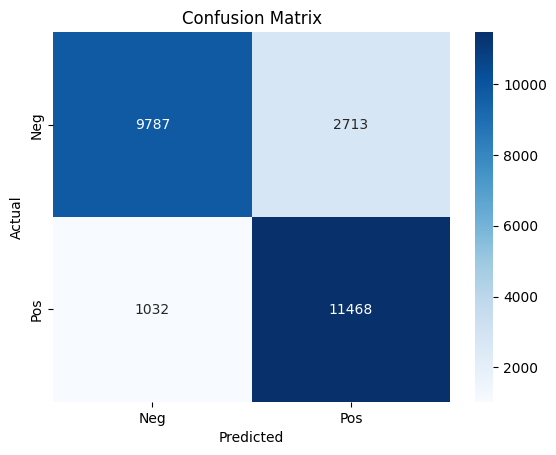

In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()